# **Flower Classification Competition (40%)**
For this competition, we will use the Flower Recognition (https://cloudstor.aarnet.edu.au/plus/s/1n6XuPUCwJ0MkgN). This dataset contains 4317 images of flowers. The data collection is based on the data flicr, google images, yandex images. You can use this datastet to recognize plants from the photo.  

The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion. For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels.Photos are not reduced to a single size, they have different proportions!

We provide a baseline by the following steps:

*   Loding and Analysing the Flowers dataset using torchvision.
*   Defining a simple convolutional neural network. 
*   How to use existing loss function for the model learning. 
*   Train the network on the training data. 
*   Test the trained network on the testing data. 
*   Generate prediction for the random test image(s). 

The following trick/tweak(s) could be considered:
-------
1. Change of advanced training parameters: Learning Rate, Optimizer, Batch-size, Number of Max Epochs, and Drop-out. 
2. Use of a new loss function.
3. Data augmentation
4. Architectural Changes: Batch Normalization, Residual layers, Attention Block, and other varients.

Your code should be modified from the provided baseline. A pdf report is required to explain the tricks you employed, and the imporvements they achieved.
Marking Rules:
-------
We will mark the competition based on the final test accuracy on testing images and your report.

Final mark = acc_mark + efficiency mark + report mark + bonus mark
###Acc_mark 15:

We will rank all the submission results based on their test accuracy. The top 30% of the students will get full marks.

|Accuracy|Mark|
|---|---|
| Top 30% in the class|          15|
|30%-50%|         11|
|50%-80%  |        7|
| 80%-90%  |      3|
| 90%-100%  |      1|
|Not implemented| 0|

###Efficiency mark 5:

Efficiency is evaluated by the computational costs (flops: https://en.wikipedia.org/wiki/FLOPS). Please report the computational costs for your final model and attach the code/process about how you calculate it.

|Efficiency|Mark|
|---|---|
| Top 30% in the class|          5|
|30%-50%|         4|
|50%-80%  |        3|
| 80%-90%  |      2|
| 90%-100%  |      2|
|Not implemented| 0|

###Report mark 20:
1. Introduction and your understanding to the baseline model: 2 points

2. Employed more than three tricks with ablation studies to improve the accuracy: 6 points

Clearly explain the reference, motivation and design choice for each trick/tweak(s). Providing the experimental results in tables.
Example table:

|Trick1|Trick2|Trick3|Accuracy|
|---|---|---|---|
|N|N|N|60%|
|Y|N|N|65%|
|Y|Y|N|77%|
|Y|Y|Y|82%|

Observation and discussion based on the experiment results.

3. Expaination of the methods on reducing the computational cost and/or improve the trade-off between accuracy and efficiency: 4 points

4. Explaination of the code implementation：3 points

5. Visulization results: e.g. training and testing accuracy/loss for each model, case studies: 3 points

6. Open ended:  Limitations, conclusions, failure cases analysis...: 2 points

###Bouns mark:
1. Top three results: 2 points
2. Fancy designs: 2 points

In [ ]:
##################################################################################################################################
### Subject: Computer Vision 
### Year: 2022
### Student Name: Karan ., Manish Kumar Khatri
### Student ID: a1792635, a1835503
### Comptetion Name: Flowers Classification Competition
### Final Results:
### ACC:         FLOPs:
##################################################################################################################################

##Data Import

## Original Data

In [1]:
!wget https://cloudstor.aarnet.edu.au/plus/s/1n6XuPUCwJ0MkgN/download
!unzip download -d /content/flowers/

--2022-06-23 01:23:49--  https://cloudstor.aarnet.edu.au/plus/s/1n6XuPUCwJ0MkgN/download
Resolving cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)... 202.158.207.20
Connecting to cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)|202.158.207.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Syntax error in Set-Cookie: 5230042dc1897=kfjoapgnf4l0d2r22punbe2ja8; path=/plus;; Secure at position 53.
Syntax error in Set-Cookie: oc_sessionPassphrase=vFBk%2BC%2F8YH8Hfe8S3jLNtqkxgFJWAIDDle%2BaAW8KSw4BKsKkVFJHaV98%2BEDdqJ4EBnn09R6YGWWpyHSSKqgZB1IY4cBXL9AIDnkn7ZCfi7l7Oh2ZiJAGaAHpAn9Itv3b; path=/plus;; Secure at position 170.
Length: 235663188 (225M) [application/zip]
Saving to: ‘download’

download            100%[===================>] 224.75M  21.2MB/s    in 11s     

2022-06-23 01:24:01 (19.6 MB/s) - ‘download’ saved [235663188/235663188]

Archive:  download
  inflating: /content/flowers/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: /content/flowers/flowers/daisy/1

In [2]:
!rm -rf download

## Augmented Data

In [4]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! mkdir flowers
!kaggle datasets download -d manishkumarkhatri/flower-classify
! unzip flower-classify.zip -d flowers

Streaming output truncated to the last 5000 lines.
  inflating: flowers/content/Augment/tulip/8686013485_3c4dfbfd1f_n_Random_Posterize_01.jpg  
  inflating: flowers/content/Augment/tulip/8686013485_3c4dfbfd1f_n_Random_Posterize_02.jpg  
  inflating: flowers/content/Augment/tulip/8686013485_3c4dfbfd1f_n_Random_Posterize_03.jpg  
  inflating: flowers/content/Augment/tulip/8686013485_3c4dfbfd1f_n_Random_Posterize_04.jpg  
  inflating: flowers/content/Augment/tulip/8686013485_3c4dfbfd1f_n_Random_Resized_Crop_01.jpg  
  inflating: flowers/content/Augment/tulip/8686013485_3c4dfbfd1f_n_Random_Resized_Crop_02.jpg  
  inflating: flowers/content/Augment/tulip/8686013485_3c4dfbfd1f_n_Random_Resized_Crop_03.jpg  
  inflating: flowers/content/Augment/tulip/8686013485_3c4dfbfd1f_n_Random_Resized_Crop_04.jpg  
  inflating: flowers/content/Augment/tulip/8686013485_3c4dfbfd1f_n_Random_Rotation_01.jpg  
  inflating: flowers/content/Augment/tulip/8686013485_3c4dfbfd1f_n_Random_Rotation_02.jpg  
  inflati

In [5]:
!rm -rf flower-classify.zip

## Model Build

In [6]:
# Importing libraries. 
##================================================================================================================================
##                                                    Importing of libraries
##================================================================================================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

# To avoid non-essential warnings 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models 
from torchvision.utils import make_grid
from sklearn.model_selection import train_test_split
from styles import *

In [7]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [ ]:
# Performing Image Transformations. 
train_transform=transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(224),             # resize shortest side to 224 pixels
        transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

In [ ]:
data_directory = '/content/flowers/'

dataset_storage='flowers'
dataset=datasets.ImageFolder(root=data_directory+dataset_storage,transform=train_transform)
dataset

Dataset ImageFolder
    Number of datapoints: 4317
    Root location: /content/flowers/flowers
    StandardTransform
Transform: Compose(
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               RandomHorizontalFlip(p=0.5)
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [ ]:
# Checking the flower class types.
class_names=dataset.classes
print(class_names)
print(len(class_names))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
5


In [ ]:
# Train and Test data split. 
train_indices, test_indices = train_test_split(list(range(len(dataset.targets))), test_size=0.2, stratify=dataset.targets)
train_data = torch.utils.data.Subset(dataset, train_indices)
test_data = torch.utils.data.Subset(dataset, test_indices)

In [ ]:
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10)

In [ ]:
print(len(train_data))
print(len(test_data))

3453
864


## Data Images and Labels

In [ ]:

# Preview of the datasets. 
for images, labels in train_loader:
    break
#print the labels
print('Label:', labels.numpy())
print('Class:', *np.array([class_names[i] for i in labels]))

im=make_grid(images,nrow=5)

Label: [3 3 1 4 3 4 1 4 1 4]
Class: sunflower sunflower dandelion tulip sunflower tulip dandelion tulip dandelion tulip


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


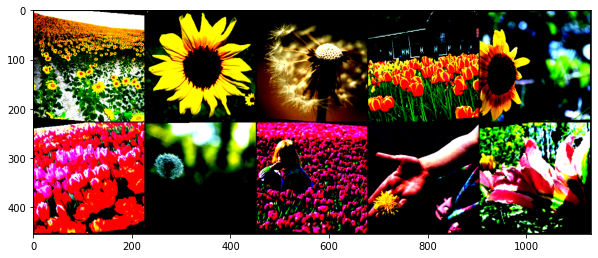

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [ ]:
# Inverse Normalization. 
inv_normalize=transforms.Normalize(mean=[-0.485/0.229,-0.456/0.224,-0.406/0.225],
                                     std=[1/0.229,1/0.224,1/0.225])
im=inv_normalize(im)

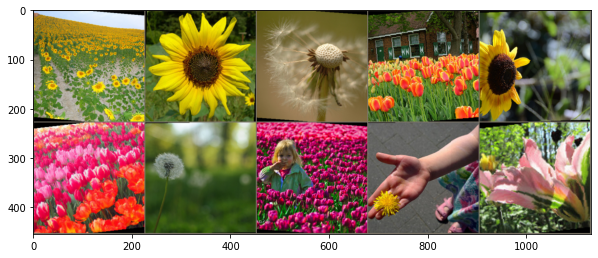

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [ ]:
# Convolutional Network - Baseline
class ConvolutionalNetwork(nn.Module):
    def __init__(self, classes):
        super().__init__()
        self.num_classes=classes
        self.conv1=nn.Conv2d(3,6,3,1)
        self.conv2=nn.Conv2d(6,16,3,1)
        self.fc1=nn.Linear(16*54*54,120) 
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,20)
        self.fc4=nn.Linear(20,self.num_classes)
    def forward(self,X):
        X=F.relu(self.conv1(X))
        X=F.max_pool2d(X,2,2)
        X=F.relu(self.conv2(X))
        X=F.max_pool2d(X,2,2)
        X=X.view(-1,16*54*54)
        X=F.relu(self.fc1(X))
        X=F.relu(self.fc2(X))
        X=F.relu(self.fc3(X))
        X=self.fc4(X)
        
        return F.log_softmax(X, dim=1)

In [ ]:
num_classes = 5
CNNmodel=ConvolutionalNetwork(num_classes)
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(CNNmodel.parameters(),lr=0.001)
batch_size=10

In [ ]:
CNNmodel

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=5, bias=True)
)

In [ ]:
# Counting of number of parameters in the model.
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>8}')
    print(f'________\n{sum(params):>8}')
count_parameters(CNNmodel)

     162
       6
     864
      16
 5598720
     120
   10080
      84
    1680
      20
     100
       5
________
 5611857



					Epoch 0
Training loss: 1.5316050052642822 batch: 50 Training accuracy:  28.600%
Training loss: 1.1885521411895752 batch: 100 Training accuracy:  35.200%
Training loss: 1.2207900285720825 batch: 150 Training accuracy:  38.400%
Training loss: 1.499765157699585 batch: 200 Training accuracy:  41.350%
Training loss: 1.4464170932769775 batch: 250 Training accuracy:  42.040%
Training loss: 1.7218948602676392 batch: 300 Training accuracy:  43.900%
epoch: 0 Testing loss: 1.1061973571777344 batch: 50 Testing accuracy:  51.600%

					Epoch 1
Training loss: 1.43924880027771 batch: 50 Training accuracy:  50.200%
Training loss: 1.1291226148605347 batch: 100 Training accuracy:  49.700%
Training loss: 0.7518267631530762 batch: 150 Training accuracy:  50.267%
Training loss: 1.2655398845672607 batch: 200 Training accuracy:  50.400%
Training loss: 0.9863311648368835 batch: 250 Training accuracy:  51.000%
Training loss: 1.2069339752197266 batch: 300 Training accuracy:  52.433%
epoch: 1 Testing loss:

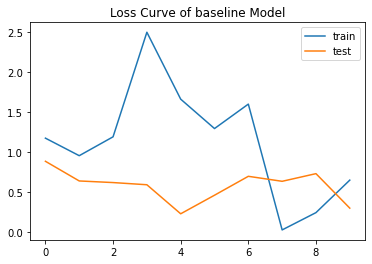


Duration: 830 seconds


In [ ]:
# Learning Schema.
import time

start_time=time.time()
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]
epochs=10

for i in range(epochs):
    trn_corr=0
    tst_corr=0
    if i<2:
      print(bold(design(f"Epoch {i}","=")))
    elif i==2:
      print("........")
    for b, (X_train,y_train) in enumerate(train_loader):
        b+=1                                            
        y_pred=CNNmodel(X_train)
        loss=criterion(y_pred,y_train)

        predicted=torch.max(y_pred.data,1)[1]
        batch_corr=(predicted==y_train).sum()
        trn_corr+=batch_corr
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if b%50==0 and i< 2:
            print(italic(f"Training loss: {loss.item()} batch: {b} Training accuracy: {trn_corr*100/(batch_size*b):7.3f}%"))
    loss=loss.detach().numpy()
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    
    with torch.no_grad():
        for b, (X_test,y_test) in enumerate(test_loader):
            y_val=CNNmodel(X_test)
            loss=criterion(y_val,y_test)
            
            predicted=torch.max(y_val.data,1)[1]
            btach_corr=(predicted==y_test).sum()
            tst_corr+=btach_corr
            if b%50==0 and b!=0:
              print(italic(f"epoch: {i} Testing loss: {loss.item()} batch: {b} Testing accuracy: {tst_corr*100/(batch_size*b):7.3f}%"))
            
        loss=loss.detach().numpy()
        test_losses.append(loss)
        test_correct.append(tst_corr)


plt.plot(train_losses,label="train")
plt.plot(test_losses,label="test")
plt.title("Loss Curve of baseline Model")
plt.legend()
plt.show()
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

## **Improvised Convolutional Neural Network**

### Addtion of Dropout Layer

In [ ]:
# Convolutional Network - Dropout
class ConvolutionalNetwork(nn.Module):
    def __init__(self, classes):
        super().__init__()
        self.num_classes=classes
        self.conv1=nn.Conv2d(3,6,3,1)
        self.conv2=nn.Conv2d(6,16,3,1)
        self.dropoutc2=nn.Dropout(0.1)
        self.fc1=nn.Linear(16*54*54,120) 
        self.fc2=nn.Linear(120,84)
        self.dropout1=nn.Dropout(0.1)
        self.fc3=nn.Linear(84,20)
        self.dropout2=nn.Dropout(0.1)
        self.fc4=nn.Linear(20,self.num_classes)

    def forward(self,X):
        X=F.relu(self.conv1(X))
        X=F.max_pool2d(X,2,2)
        X=F.relu(self.conv2(X))
        X=self.dropoutc2(X)
        X=F.max_pool2d(X,2,2)
        X=X.view(-1,16*54*54)
        X=F.relu(self.fc1(X))
        X=F.relu(self.fc2(X))
        X=self.dropout1(X)
        X=F.relu(self.fc3(X))
        X=self.dropout2(X)
        X=self.fc4(X)
        return F.log_softmax(X, dim=1)

In [ ]:
num_classes = 5
dropout_CNNmodel=ConvolutionalNetwork(num_classes).to(device)
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(dropout_CNNmodel.parameters(),lr=0.001)
batch_size=10

In [ ]:
dropout_CNNmodel

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (dropoutc2): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (fc3): Linear(in_features=84, out_features=20, bias=True)
  (dropout2): Dropout(p=0.1, inplace=False)
  (fc4): Linear(in_features=20, out_features=5, bias=True)
)


					Epoch 0
Training loss: 1.7716699838638306 batch: 50 Training accuracy:  30.600%
Training loss: 1.386291265487671 batch: 100 Training accuracy:  35.000%
Training loss: 1.28480064868927 batch: 150 Training accuracy:  36.333%
Training loss: 1.4571938514709473 batch: 200 Training accuracy:  38.350%
Training loss: 1.3667383193969727 batch: 250 Training accuracy:  39.640%
Training loss: 1.6195192337036133 batch: 300 Training accuracy:  40.000%
epoch: 0 Testing loss: 1.048051357269287 batch: 50 Testing accuracy:  51.800%

					Epoch 1
Training loss: 1.740160346031189 batch: 50 Training accuracy:  49.200%
Training loss: 1.0884284973144531 batch: 100 Training accuracy:  49.400%
Training loss: 1.3161594867706299 batch: 150 Training accuracy:  49.933%
Training loss: 1.5799580812454224 batch: 200 Training accuracy:  50.700%
Training loss: 1.351599097251892 batch: 250 Training accuracy:  50.840%
Training loss: 1.0748754739761353 batch: 300 Training accuracy:  50.800%
epoch: 1 Testing loss: 0.

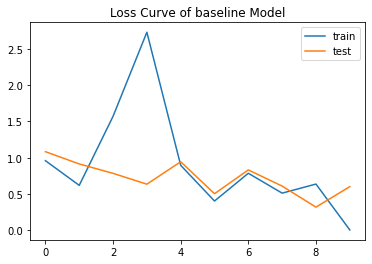


Duration: 886 seconds


In [ ]:
# Learning Schema.
import time

start_time=time.time()
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]
epochs=10

for i in range(epochs):
    trn_corr=0
    tst_corr=0
    if i<2:
      print(bold(design(f"Epoch {i}","=")))
    elif i==2:
      print("........")
    for b, (X_train,y_train) in enumerate(train_loader):
        b+=1                                            
        y_pred=dropout_CNNmodel(X_train)
        loss=criterion(y_pred,y_train)

        predicted=torch.max(y_pred.data,1)[1]
        batch_corr=(predicted==y_train).sum()
        trn_corr+=batch_corr
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if b%50==0 and i< 2:
            print(italic(f"Training loss: {loss.item()} batch: {b} Training accuracy: {trn_corr*100/(batch_size*b):7.3f}%"))
    loss=loss.detach().numpy()
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    
    with torch.no_grad():
        for b, (X_test,y_test) in enumerate(test_loader):
            y_val=dropout_CNNmodel(X_test)
            loss=criterion(y_val,y_test)
            
            predicted=torch.max(y_val.data,1)[1]
            btach_corr=(predicted==y_test).sum()
            tst_corr+=btach_corr
            if b%50==0 and b!=0:
              print(italic(f"epoch: {i} Testing loss: {loss.item()} batch: {b} Testing accuracy: {tst_corr*100/(batch_size*b):7.3f}%"))
            
        loss=loss.detach().numpy()
        test_losses.append(loss)
        test_correct.append(tst_corr)


plt.plot(train_losses,label="train")
plt.plot(test_losses,label="test")
plt.title("Loss Curve of baseline Model")
plt.legend()
plt.show()
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

### Additon of Batch Normalization

In [ ]:
# Convolutional Network - Baseline
class ConvolutionalNetwork(nn.Module):
    def __init__(self, classes):
        super().__init__()
        self.num_classes=classes
        self.layer1=nn.Sequential(
            nn.Conv2d(3,6,3,1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2=nn.Sequential(
            nn.Conv2d(6,16,3,1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(0.1),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer3=nn.Sequential(
            nn.Linear(16*54*54,120), 
            nn.ReLU(),
            nn.BatchNorm1d(120)
        )

        self.layer4=nn.Sequential(
            nn.Linear(120,84), 
            nn.ReLU(),
            nn.Dropout(0.1),
        )

        self.layer5=nn.Sequential(
            nn.Linear(84,20), 
            nn.ReLU(),
            nn.Dropout(0.1),
        )    

        self.fc4=nn.Linear(20,self.num_classes)

    def forward(self,X):
        X=self.layer1(X)
        X=self.layer2(X)
        X=X.view(-1,16*54*54)
        X=self.layer3(X)
        X=self.layer4(X)
        X=self.layer5(X)
        X=self.fc4(X)

        return F.log_softmax(X, dim=1)

In [ ]:
num_classes = 5
DB_CNNmodel=ConvolutionalNetwork(num_classes)
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(DB_CNNmodel.parameters(),lr=0.001)
batch_size=10

In [ ]:
DB_CNNmodel

ConvolutionalNetwork(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=46656, out_features=120, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer4): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (layer5): Sequential(
    (0): Linear(in_features=84, out_features=20, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False


					Epoch 0
Training loss: 1.4592821598052979 batch: 50 Training accuracy:  33.200%
Training loss: 1.2497694492340088 batch: 100 Training accuracy:  35.000%
Training loss: 1.1276581287384033 batch: 150 Training accuracy:  36.667%
Training loss: 1.3084036111831665 batch: 200 Training accuracy:  40.350%
Training loss: 0.8047062158584595 batch: 250 Training accuracy:  41.720%
Training loss: 1.013427734375 batch: 300 Training accuracy:  42.533%
epoch: 0 Testing loss: 1.1187773942947388 batch: 50 Testing accuracy:  58.200%

					Epoch 1
Training loss: 0.9530666470527649 batch: 50 Training accuracy:  55.800%
Training loss: 1.116220474243164 batch: 100 Training accuracy:  53.800%
Training loss: 0.9403141736984253 batch: 150 Training accuracy:  54.800%
Training loss: 0.8728348016738892 batch: 200 Training accuracy:  54.900%
Training loss: 1.231398582458496 batch: 250 Training accuracy:  54.200%
Training loss: 1.3424841165542603 batch: 300 Training accuracy:  54.500%
epoch: 1 Testing loss: 0.

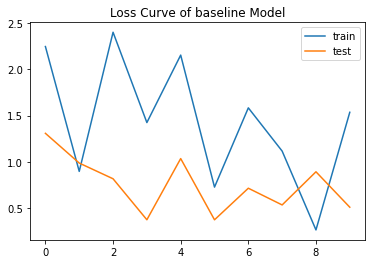


Duration: 905 seconds


In [ ]:
# Learning Schema.
import time

start_time=time.time()
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]
epochs=10

for i in range(epochs):
    trn_corr=0
    tst_corr=0
    if i<2:
      print(bold(design(f"Epoch {i}","=")))
    elif i==2:
      print("........")
    for b, (X_train,y_train) in enumerate(train_loader):
        b+=1                                            
        y_pred=DB_CNNmodel(X_train)
        loss=criterion(y_pred,y_train)

        predicted=torch.max(y_pred.data,1)[1]
        batch_corr=(predicted==y_train).sum()
        trn_corr+=batch_corr
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if b%50==0 and i< 2:
            print(italic(f"Training loss: {loss.item()} batch: {b} Training accuracy: {trn_corr*100/(batch_size*b):7.3f}%"))
    loss=loss.detach().numpy()
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    
    with torch.no_grad():
        for b, (X_test,y_test) in enumerate(test_loader):
            y_val=DB_CNNmodel(X_test)
            loss=criterion(y_val,y_test)
            
            predicted=torch.max(y_val.data,1)[1]
            btach_corr=(predicted==y_test).sum()
            tst_corr+=btach_corr
            if b%50==0 and b!=0:
              print(italic(f"epoch: {i} Testing loss: {loss.item()} batch: {b} Testing accuracy: {tst_corr*100/(batch_size*b):7.3f}%"))
            
        loss=loss.detach().numpy()
        test_losses.append(loss)
        test_correct.append(tst_corr)


plt.plot(train_losses,label="train")
plt.plot(test_losses,label="test")
plt.title("Loss Curve of baseline Model")
plt.legend()
plt.show()
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

### Addtion of Hyper Optimizer

In [ ]:
# Convolutional Network - Baseline
class ConvolutionalNetwork(nn.Module):
    def __init__(self, classes):
        super().__init__()
        self.num_classes=classes
        self.layer1=nn.Sequential(
            nn.Conv2d(3,6,3,1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2=nn.Sequential(
            nn.Conv2d(6,16,3,1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(0.1),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer3=nn.Sequential(
            nn.Linear(16*54*54,120), 
            nn.ReLU(),
            nn.BatchNorm1d(120)
        )

        self.layer4=nn.Sequential(
            nn.Linear(120,84), 
            nn.ReLU(),
            nn.Dropout(0.1),
        )

        self.layer5=nn.Sequential(
            nn.Linear(84,20), 
            nn.ReLU(),
            nn.Dropout(0.1),
        )    

        self.fc4=nn.Linear(20,self.num_classes)

    def forward(self,X):
        X=self.layer1(X)
        X=self.layer2(X)
        X=X.view(-1,16*54*54)
        X=self.layer3(X)
        X=self.layer4(X)
        X=self.layer5(X)
        X=self.fc4(X)

        return F.log_softmax(X, dim=1)

In [ ]:
num_classes = 5
fin_CNNmodel=ConvolutionalNetwork(num_classes)
fin_CNNmodel

ConvolutionalNetwork(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=46656, out_features=120, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer4): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (layer5): Sequential(
    (0): Linear(in_features=84, out_features=20, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False

In [ ]:
# Counting of number of parameters in the model.
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>8}')
    print(f'________\n{sum(params):>8}')
count_parameters(fin_CNNmodel)

     162
       6
     864
      16
      16
      16
 5598720
     120
     120
     120
   10080
      84
    1680
      20
     100
       5
________
 5612129


In [ ]:
!pip install --quiet optuna

In [ ]:
import optuna
##======================================================================================================================
## This is the optimizer using optuna which hypertunes the model for the given parameters
## For now it implements the Optimizer, Learning rate, and loss function
## And epoch and batch size have already been choosen by the theoritical study approach
## epoch: 2
## batch size: 10
##======================================================================================================================

def objective(trial):
    test_accuracy=[]

    num_classes = 5
    cnnmodel = ConvolutionalNetwork(num_classes)
    epochs=2

    ## parameter's
    lropts=[1e-02, 1e-03, 1e-04, 1e-05]
    lr =trial.suggest_categorical('lr',lropts)
    opts=[torch.optim.Adam, torch.optim.AdamW, torch.optim.Adamax, torch.optim.RAdam, torch.optim.ASGD, torch.optim.Adadelta,  
           torch.optim.Adagrad, torch.optim.NAdam, torch.optim.RMSprop, torch.optim.SGD]
    optimiz=trial.suggest_categorical('optimizer',opts)

    loss_functions=[nn.CrossEntropyLoss, nn.NLLLoss]
    criteri=trial.suggest_categorical('loss',loss_functions)
    criterion=criteri()
    optimizer= optimiz(cnnmodel.parameters(),lr=0.001)

    #Train and test the model
    for i in range(epochs):
      trn_corr=0
      tst_corr=0
      for b, (X_train,y_train) in enumerate(train_loader):
          b+=1                                            
          y_pred=cnnmodel(X_train)
          loss=criterion(y_pred,y_train)

          predicted=torch.max(y_pred.data,1)[1]
          batch_corr=(predicted==y_train).sum()
          trn_corr+=batch_corr
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
      loss=loss.detach().numpy()
      
      
      with torch.no_grad():
          for b, (X_test,y_test) in enumerate(test_loader):
              y_val=cnnmodel(X_test)
              loss=criterion(y_val,y_test)
              
              predicted=torch.max(y_val.data,1)[1]
              btach_corr=(predicted==y_test).sum()
              tst_corr+=btach_corr
              
          loss=loss.detach().numpy()
          test_accuracy.append(tst_corr.item()*100/(batch_size*b))
          
          
    return max(test_accuracy)

print(bold("Calculation of Convolutional Neural Network Parameters By the method of optmization:"))
print(f"{'*'*80}\n\t\t\t\t Calculation of Value of Parameters:\n{'*'*80}")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

optuna.visualization.plot_optimization_history(study)

[I 2022-06-22 14:16:29,807] A new study created in memory with name: no-name-7b7e01eb-ca14-43c8-b318-11c6f5629707


Calculation of Convolutional Neural Network Parameters By the method of optmization:
********************************************************************************
				 Calculation of Value of Parameters:
********************************************************************************


[I 2022-06-22 14:18:48,519] Trial 0 finished with value: 27.906976744186046 and parameters: {'lr': 0.0001, 'optimizer': <class 'torch.optim.adadelta.Adadelta'>, 'loss': <class 'torch.nn.modules.loss.CrossEntropyLoss'>}. Best is trial 0 with value: 27.906976744186046.
[I 2022-06-22 14:21:02,204] Trial 1 finished with value: 58.72093023255814 and parameters: {'lr': 0.0001, 'optimizer': <class 'torch.optim.adam.Adam'>, 'loss': <class 'torch.nn.modules.loss.NLLLoss'>}. Best is trial 1 with value: 58.72093023255814.
[I 2022-06-22 14:23:11,661] Trial 2 finished with value: 56.16279069767442 and parameters: {'lr': 1e-05, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'loss': <class 'torch.nn.modules.loss.NLLLoss'>}. Best is trial 1 with value: 58.72093023255814.
[I 2022-06-22 14:25:06,226] Trial 3 finished with value: 34.883720930232556 and parameters: {'lr': 0.01, 'optimizer': <class 'torch.optim.sgd.SGD'>, 'loss': <class 'torch.nn.modules.loss.NLLLoss'>}. Best is trial 1 with value: 58

Accuracy: 60.93023255813954
Best hyperparameters: {'lr': 0.001, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'loss': <class 'torch.nn.modules.loss.CrossEntropyLoss'>}



					Epoch 0
Training loss: 1.279824137687683 batch: 50 Training accuracy:  34.800%
Training loss: 1.3225635290145874 batch: 100 Training accuracy:  38.300%
Training loss: 1.2767223119735718 batch: 150 Training accuracy:  42.000%
Training loss: 1.2020480632781982 batch: 200 Training accuracy:  43.000%
Training loss: 0.8638731241226196 batch: 250 Training accuracy:  45.160%
Training loss: 0.9437988996505737 batch: 300 Training accuracy:  46.233%
epoch: 0 Testing loss: 0.7344260215759277 batch: 50 Testing accuracy:  62.800%

					Epoch 1
Training loss: 0.9844539761543274 batch: 50 Training accuracy:  57.000%
Training loss: 0.927193820476532 batch: 100 Training accuracy:  57.900%
Training loss: 1.0737801790237427 batch: 150 Training accuracy:  56.733%
Training loss: 0.8070012331008911 batch: 200 Training accuracy:  57.550%
Training loss: 0.9804873466491699 batch: 250 Training accuracy:  57.200%
Training loss: 0.6963293552398682 batch: 300 Training accuracy:  57.733%
epoch: 1 Testing loss

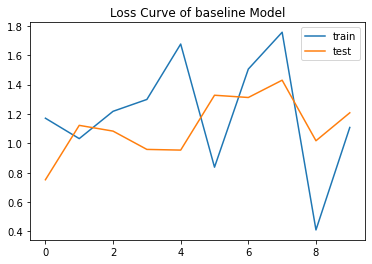


Duration: 458 seconds


In [ ]:
# Learning Schema.
## After Hyper Optimization the final hyper parameters have been taken for the model creation.
import time

num_classes = 5
DB_CNNmodel=ConvolutionalNetwork(num_classes)
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.RMSprop(DB_CNNmodel.parameters(),lr=0.001)
batch_size=10

start_time=time.time()
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]
epochs=10

for i in range(epochs):
    trn_corr=0
    tst_corr=0
    if i<2:
      print(bold(design(f"Epoch {i}","=")))
    elif i==2:
      print("........")
    for b, (X_train,y_train) in enumerate(train_loader):
        b+=1                                            
        y_pred=DB_CNNmodel(X_train)
        loss=criterion(y_pred,y_train)

        predicted=torch.max(y_pred.data,1)[1]
        batch_corr=(predicted==y_train).sum()
        trn_corr+=batch_corr
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if b%50==0 and i< 2:
            print(italic(f"Training loss: {loss.item()} batch: {b} Training accuracy: {trn_corr*100/(batch_size*b):7.3f}%"))
    loss=loss.detach().numpy()
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    
    with torch.no_grad():
        for b, (X_test,y_test) in enumerate(test_loader):
            y_val=DB_CNNmodel(X_test)
            loss=criterion(y_val,y_test)
            
            predicted=torch.max(y_val.data,1)[1]
            btach_corr=(predicted==y_test).sum()
            tst_corr+=btach_corr
            if b%50==0 and b!=0:
              print(italic(f"epoch: {i} Testing loss: {loss.item()} batch: {b} Testing accuracy: {tst_corr*100/(batch_size*b):7.3f}%"))
            
        loss=loss.detach().numpy()
        test_losses.append(loss)
        test_correct.append(tst_corr)


plt.plot(train_losses,label="train")
plt.plot(test_losses,label="test")
plt.title("Loss Curve of baseline Model")
plt.legend()
plt.show()
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

### Data Augmentation

In [8]:
# Convolutional Network - Baseline
class ConvolutionalNetwork(nn.Module):
    def __init__(self, classes):
        super().__init__()
        self.num_classes=classes
        self.layer1=nn.Sequential(
            nn.Conv2d(3,6,3,1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2=nn.Sequential(
            nn.Conv2d(6,16,3,1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(0.1),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer3=nn.Sequential(
            nn.Linear(16*54*54,120), 
            nn.ReLU(),
            nn.BatchNorm1d(120)
        )

        self.layer4=nn.Sequential(
            nn.Linear(120,84), 
            nn.ReLU(),
            nn.Dropout(0.1),
        )

        self.layer5=nn.Sequential(
            nn.Linear(84,20), 
            nn.ReLU(),
            nn.Dropout(0.1),
        )    

        self.fc4=nn.Linear(20,self.num_classes)

    def forward(self,X):
        X=self.layer1(X)
        X=self.layer2(X)
        X=X.view(-1,16*54*54)
        X=self.layer3(X)
        X=self.layer4(X)
        X=self.layer5(X)
        X=self.fc4(X)

        return F.log_softmax(X, dim=1)

In [9]:
# Performing Image Transformations. 
train_transform=transforms.Compose([
        transforms.Resize(224),             # resize shortest side to 224 pixels
        transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

data_directory = '/content/flowers/content/'
## Augmented data stored in Augment folder of the flowers directory
dataset_storage='Augment'
dataset=datasets.ImageFolder(root=data_directory+dataset_storage,transform=train_transform)
dataset

Dataset ImageFolder
    Number of datapoints: 259020
    Root location: /content/flowers/content/Augment
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [10]:
# Train and Test data split. 
train_indices, test_indices = train_test_split(list(range(len(dataset.targets))), test_size=0.2, stratify=dataset.targets)
train_data = torch.utils.data.Subset(dataset, train_indices)
test_data = torch.utils.data.Subset(dataset, test_indices)

In [11]:
train_loader=DataLoader(train_data,batch_size=500,shuffle=True)
test_loader=DataLoader(test_data,batch_size=500)
batch_size=500

In [11]:
print(len(train_data))
print(len(test_data))

207216
51804


In [ ]:
# class_names=dataset.classes

# # Preview of the datasets. 
# for images, labels in train_loader:
#     break
# #print the labels
# print('Label:', labels.numpy())
# print('Class:', *np.array([class_names[i] for i in labels]))

# im=make_grid(images,nrow=5)

# # Inverse Normalization. 
# inv_normalize=transforms.Normalize(mean=[-0.485/0.229,-0.456/0.224,-0.406/0.225],
#                                      std=[1/0.229,1/0.224,1/0.225])
# im=inv_normalize(im)

Label: [0 1 4 ... 2 1 2]
Class: daisy dandelion tulip tulip tulip dandelion daisy rose sunflower sunflower sunflower dandelion daisy dandelion dandelion dandelion tulip daisy daisy tulip rose dandelion rose daisy dandelion daisy dandelion sunflower tulip dandelion tulip rose rose daisy dandelion rose sunflower dandelion daisy dandelion sunflower tulip daisy rose daisy tulip rose tulip sunflower rose sunflower dandelion rose dandelion tulip sunflower rose sunflower rose sunflower daisy dandelion rose daisy sunflower dandelion sunflower tulip dandelion tulip sunflower sunflower dandelion daisy rose rose dandelion daisy sunflower rose dandelion dandelion rose rose sunflower tulip rose daisy rose rose tulip dandelion dandelion tulip daisy dandelion dandelion dandelion rose tulip rose sunflower dandelion tulip tulip sunflower daisy tulip tulip sunflower dandelion tulip tulip dandelion dandelion daisy daisy rose sunflower daisy tulip tulip rose dandelion tulip sunflower dandelion dandelion t

In [ ]:
# ###########################################################################################################################################################
# ## Remove this cell 
# # Performing Image Transformations. 

# train_transform=transforms.Compose([

#         transforms.Resize(224),             # resize shortest side to 224 pixels
#         transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406],
#                              [0.229, 0.224, 0.225])
# ])
# data_directory = '/content/flowers/'

# dataset_storage='flowers'
# dataset=datasets.ImageFolder(root=data_directory+dataset_storage,transform=train_transform)

# # Train and Test data split. 
# train_indices, test_indices = train_test_split(list(range(len(dataset.targets))), test_size=0.2, stratify=dataset.targets)
# train_data = torch.utils.data.Subset(dataset, train_indices)
# test_data = torch.utils.data.Subset(dataset, test_indices)


# train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
# test_loader=DataLoader(test_data,batch_size=10)
# batch_size=10

In [ ]:
import optuna
##======================================================================================================================
## This is the optimizer using optuna which hypertunes the model for the given parameters
## For now it implements the Optimizer, Learning rate, and loss function
## And epoch and batch size have already been choosen by the theoritical study approach
## epoch: 2
## batch size: 10
##======================================================================================================================

def objective(trial):
    test_accuracy=[]

    num_classes = 5
    cnnmodel = ConvolutionalNetwork(num_classes)
    epochs=2

    ## parameter's
    lropts=[1e-02, 1e-03, 1e-04, 1e-05]
    lr =trial.suggest_categorical('lr',lropts)
    opts=[torch.optim.Adam, torch.optim.AdamW, torch.optim.Adamax, torch.optim.RAdam, torch.optim.ASGD, torch.optim.Adadelta,  
           torch.optim.Adagrad, torch.optim.NAdam, torch.optim.RMSprop, torch.optim.SGD]
    optimiz=trial.suggest_categorical('optimizer',opts)

    loss_functions=[nn.CrossEntropyLoss, nn.NLLLoss]
    criteri=trial.suggest_categorical('loss',loss_functions)
    criterion=criteri()
    optimizer= optimiz(cnnmodel.parameters(),lr=0.001)

    #Train and test the model
    for i in range(epochs):
      trn_corr=0
      tst_corr=0
      for b, (X_train,y_train) in enumerate(train_loader):
          b+=1                                            
          y_pred=cnnmodel(X_train)
          loss=criterion(y_pred,y_train)

          predicted=torch.max(y_pred.data,1)[1]
          batch_corr=(predicted==y_train).sum()
          trn_corr+=batch_corr
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
      loss=loss.detach().numpy()
      
      
      with torch.no_grad():
          for b, (X_test,y_test) in enumerate(test_loader):
              y_val=cnnmodel(X_test)
              loss=criterion(y_val,y_test)
              
              predicted=torch.max(y_val.data,1)[1]
              btach_corr=(predicted==y_test).sum()
              tst_corr+=btach_corr
              
          loss=loss.detach().numpy()
          test_accuracy.append(tst_corr.item()*100/(batch_size*b))
          
          
    return max(test_accuracy)

print(bold("Calculation of Convolutional Neural Network Parameters By the method of optmization:"))
print(f"{'*'*80}\n\t\t\t\t Calculation of Value of Parameters:\n{'*'*80}")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

optuna.visualization.plot_optimization_history(study)

[I 2022-06-22 15:29:24,795] A new study created in memory with name: no-name-a5f32028-cd04-4946-8c44-5cae02839fd4


Calculation of Convolutional Neural Network Parameters By the method of optmization:
********************************************************************************
				 Calculation of Value of Parameters:
********************************************************************************


[I 2022-06-22 15:31:07,432] Trial 0 finished with value: 56.627906976744185 and parameters: {'lr': 0.0001, 'optimizer': <class 'torch.optim.radam.RAdam'>, 'loss': <class 'torch.nn.modules.loss.NLLLoss'>}. Best is trial 0 with value: 56.627906976744185.
[I 2022-06-22 15:32:49,384] Trial 1 finished with value: 56.04651162790697 and parameters: {'lr': 0.0001, 'optimizer': <class 'torch.optim.radam.RAdam'>, 'loss': <class 'torch.nn.modules.loss.CrossEntropyLoss'>}. Best is trial 0 with value: 56.627906976744185.
[I 2022-06-22 15:34:27,627] Trial 2 finished with value: 57.7906976744186 and parameters: {'lr': 1e-05, 'optimizer': <class 'torch.optim.adamax.Adamax'>, 'loss': <class 'torch.nn.modules.loss.NLLLoss'>}. Best is trial 2 with value: 57.7906976744186.
[I 2022-06-22 15:36:02,134] Trial 3 finished with value: 59.06976744186046 and parameters: {'lr': 0.01, 'optimizer': <class 'torch.optim.adam.Adam'>, 'loss': <class 'torch.nn.modules.loss.CrossEntropyLoss'>}. Best is trial 3 with value:

Accuracy: 61.16279069767442
Best hyperparameters: {'lr': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'loss': <class 'torch.nn.modules.loss.NLLLoss'>}


## Final Model Creation

In [12]:
###########################################################################################################################################################
## Remove this cell 
# Performing Image Transformations. 

train_transform=transforms.Compose([
        transforms.Resize(224),             # resize shortest side to 224 pixels
        transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

data_directory = '/content/flowers/content/'
## Augmented data stored in Augment folder of the flowers directory
dataset_storage='Augment'
dataset=datasets.ImageFolder(root=data_directory+dataset_storage,transform=train_transform)
print(datasets)
# Train and Test data split. 
train_indices, test_indices = train_test_split(list(range(len(dataset.targets))), test_size=0.2, stratify=dataset.targets)
train_data = torch.utils.data.Subset(dataset, train_indices)
test_data = torch.utils.data.Subset(dataset, test_indices)


train_loader=DataLoader(train_data,batch_size=300,shuffle=True)
test_loader=DataLoader(test_data,batch_size=300)
batch_size=300
trial={}

trial['params']={'lr': 0.01, 'optimizer': torch.optim.RMSprop, 'loss': torch.nn.NLLLoss}

<module 'torchvision.datasets' from '/usr/local/lib/python3.7/dist-packages/torchvision/datasets/__init__.py'>


In [13]:



# ###########################################################################################################################################################
# ## Remove this cell 
# # Performing Image Transformations. 

# train_transform=transforms.Compose([

#         transforms.Resize(224),             # resize shortest side to 224 pixels
#         transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406],
#                              [0.229, 0.224, 0.225])
# ])
# data_directory = '/content/flowers/'

# dataset_storage='flowers'
# dataset=datasets.ImageFolder(root=data_directory+dataset_storage,transform=train_transform)

# # Train and Test data split. 
# train_indices, test_indices = train_test_split(list(range(len(dataset.targets))), test_size=0.2, stratify=dataset.targets)
# train_data = torch.utils.data.Subset(dataset, train_indices)
# test_data = torch.utils.data.Subset(dataset, test_indices)


# train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
# test_loader=DataLoader(test_data,batch_size=10)
# batch_size=10

In [ ]:
# Learning Schema.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device in usage:{device}")

import time

num_classes = 5
finalCNNmodel = ConvolutionalNetwork(num_classes).to(device)
epochs=50
optimized=trial['params']['optimizer']
learning_rate=trial['params']['lr']
optimizer=optimized(finalCNNmodel.parameters(),lr=learning_rate)
lossfunc=trial['params']['loss']
criterion=lossfunc()

print(bold(design("Parameters used for Training:","=")))
print(f'{bold("Number of Max Epochs: ")}{epochs}')
print(f'{bold("Batch_size:")}{batch_size}')
print(f'{bold("Optimizer:")}{optimizer}')
print(f'{bold("Loss function:")}{lossfunc}')
print(f'{bold("Model Structure:")}{finalCNNmodel}')
print("\n")
print(bold(design("Model Getting Trained","-")))


start_time=time.time()
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]
epochs=50

for i in range(epochs):
    trn_corr=0
    tst_corr=0
    if i<2:
      print(bold(design(f"Epoch {i}","=")))
    elif i==2:
      print("........")
    for b, (X_train,y_train) in enumerate(train_loader):
        X_train,y_train=X_train.to(device), y_train.to(device)
        b+=1                                            
        y_pred=finalCNNmodel(X_train)
        loss=criterion(y_pred,y_train)

        predicted=torch.max(y_pred.data,1)[1]
        batch_corr=(predicted==y_train).sum()
        trn_corr+=batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%100==0 and i<2:
              print(italic(f"Training loss: {loss.item()} batch: {b} Training accuracy: {trn_corr*100/(batch_size*b):7.3f}%"))
    loss=loss.detach().cpu().numpy()
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    
    with torch.no_grad():
        for b, (X_test,y_test) in enumerate(test_loader):
            X_test,y_test=X_test.to(device), y_test.to(device)
            y_val=finalCNNmodel(X_test)
            loss=criterion(y_val,y_test)
            
            predicted=torch.max(y_val.data,1)[1]
            btach_corr=(predicted==y_test).sum()
            tst_corr+=btach_corr
            if b%100==0 and b!=0:
              print(italic(f"epoch:{i} Testing loss: {loss.item()} batch: {b} Testing accuracy: {tst_corr*100/(batch_size*b):7.3f}%"))
        loss=loss.detach().cpu().numpy()
        test_losses.append(loss)
        test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Device in usage:cuda

					Parameters used for Training:
Number of Max Epochs: 50
Batch_size:300
Optimizer:RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    eps: 1e-08
    lr: 0.01
    momentum: 0
    weight_decay: 0
)
Loss function:<class 'torch.nn.modules.loss.NLLLoss'>
Model Structure:ConvolutionalNetwork(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=46656, out_features=120, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, trac

In [ ]:
# Learning Schema.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device in usage:{device}")

import time

num_classes = 5
finalCNNmodel = ConvolutionalNetwork(num_classes).to(device)
epochs=50
optimized=trial['params']['optimizer']
learning_rate=trial['params']['lr']
optimizer=optimized(finalCNNmodel.parameters(),lr=learning_rate)
lossfunc=trial['params']['loss']
criterion=lossfunc()

print(bold(design("Parameters used for Training:","=")))
print(f'{bold("Number of Max Epochs: ")}{epochs}')
print(f'{bold("Batch_size:")}{batch_size}')
print(f'{bold("Optimizer:")}{optimizer}')
print(f'{bold("Loss function:")}{lossfunc}')
print(f'{bold("Model Structure:")}{finalCNNmodel}')
print("\n")
print(bold(design("Model Getting Trained","-")))


start_time=time.time()
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]
epochs=50

for i in range(epochs):
    trn_corr=0
    tst_corr=0
    if i<2:
      print(bold(design(f"Epoch {i}","=")))
    elif i==2:
      print("........")
    for b, (X_train,y_train) in enumerate(train_loader):
        X_train,y_train=X_train.to(device), y_train.to(device)
        b+=1                                            
        y_pred=finalCNNmodel(X_train)
        loss=criterion(y_pred,y_train)

        predicted=torch.max(y_pred.data,1)[1]
        batch_corr=(predicted==y_train).sum()
        trn_corr+=batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%100==0 and i<2:
              print(italic(f"Training loss: {loss.item()} batch: {b} Training accuracy: {trn_corr*100/(batch_size*b):7.3f}%"))
    loss=loss.detach().cpu().numpy()
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    
    with torch.no_grad():
        for b, (X_test,y_test) in enumerate(test_loader):
            X_test,y_test=X_test.to(device), y_test.to(device)
            y_val=finalCNNmodel(X_test)
            loss=criterion(y_val,y_test)
            
            predicted=torch.max(y_val.data,1)[1]
            btach_corr=(predicted==y_test).sum()
            tst_corr+=btach_corr
            if b%50==0 and b!=0:
              print(italic(f"epoch:{i} Testing loss: {loss.item()} batch: {b} Testing accuracy: {tst_corr*100/(batch_size*b):7.3f}%"))
        loss=loss.detach().cpu().numpy()
        test_losses.append(loss)
        test_correct.append(tst_corr)
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Device in usage:cuda

					Parameters used for Training:
Number of Max Epochs: 50
Batch_size:500
Optimizer:RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    eps: 1e-08
    lr: 0.01
    momentum: 0
    weight_decay: 0
)
Loss function:<class 'torch.nn.modules.loss.NLLLoss'>
Model Structure:ConvolutionalNetwork(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=46656, out_features=120, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, trac

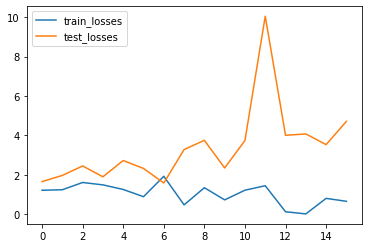

In [ ]:
# Plotting loss over time. 
plt.plot(train_losses,label="train_losses")
plt.plot(test_losses,label="test_losses")
plt.legend()

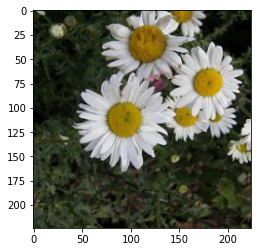

In [ ]:
x=100
im = inv_normalize(test_data[x][0])
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [ ]:
test_data[x][0].shape

torch.Size([3, 224, 224])

In [ ]:
# Prediction for one of the samples. 
finalCNNmodel.eval()
with torch.no_grad():
    new_pred=finalCNNmodel(test_data[x][0].view(1,3,224,224)).argmax()
print(f'Predicted value: {new_pred.item()} {class_names[new_pred.item()]}')

Predicted value: 0 daisy


In [ ]:
torch.save(finalCNNmodel.state_dict(), '/content/flower.h5')

##FLOPs

In [ ]:

#The code from https://cloudstor.aarnet.edu.au/plus/s/PcSc67ZncTSQP0E can be used to count flops
#Download the code.
!wget -c https://cloudstor.aarnet.edu.au/plus/s/hXo1dK9SZqiEVn9/download
!mv download FLOPs_counter.py
!rm -rf download

--2022-06-22 17:22:20--  https://cloudstor.aarnet.edu.au/plus/s/hXo1dK9SZqiEVn9/download
Resolving cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)... 202.158.207.20
Connecting to cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)|202.158.207.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Syntax error in Set-Cookie: 5230042dc1897=p7vavvaq306lvh95t7buv6ter1; path=/plus;; Secure at position 53.
Syntax error in Set-Cookie: oc_sessionPassphrase=MTbCyZ9f%2BBldDFIHn%2BHT82Dmq9d%2FbQqctD3eYPEuRLIm8yOC1uCaKs9XrzDtaihvOd96bWlbqmijTRb1l3KkH%2Bir3opLN9oDmTzqwzU1I2fKfsI%2Fgp5WUKynhax3xBiy; path=/plus;; Secure at position 172.
Length: 5201 (5.1K) [text/x-python]
Saving to: ‘download’

download            100%[===================>]   5.08K  --.-KB/s    in 0s      

2022-06-22 17:22:22 (562 MB/s) - ‘download’ saved [5201/5201]



In [ ]:
from FLOPs_counter import print_model_parm_flops
input = torch.randn(6000, 3, 224, 224) # The input size should be the same as the size that you put into your model 
#Get the network and its FLOPs
num_classes = 5
model = ConvolutionalNetwork(num_classes)
print_model_parm_flops(model, input, detail=False)

 + Number of FLOPs: 22.48G
